# Lets Proceed with Phase-3 which is a SQL Queries

In [29]:
import sqlite3
import csv
import pandas as pd
import os


In [2]:
db=sqlite3.connect("crime_database")

In [3]:
cursor=db.cursor()

In [4]:
cursor.execute("DROP TABLE crime_against_women_new1")
db.commit()


In [5]:
cursor.execute("CREATE TABLE crime_against_women_new1(state UT TEXT,DISTRICT TEXT,Year INT,Rape INT,Kidnapping INT,Dowry Deaths INT,Assault INT,Insult  INT,Cruelty by Husband  INT,Importation of Girls INT) ")

db.commit()

# 3.1 Now Here we Creating a table with the entries from 42_District_wise_crimes_committed_against_women_2001_2012.csv

In [7]:
import os
print(os.getcwd())

C:\Users\Dhananjay


In [14]:
import os
print(os.path.abspath(r'C:\Users\Dhananjay\42_District_wise_crimes_committed_against_women_2001_2012_new.csv'))


C:\Users\Dhananjay\42_District_wise_crimes_committed_against_women_2001_2012_new.csv


In [16]:
import os
import pandas as pd


file_name = "42_District_wise_crimes_committed_against_women_2001_2012.csv"
file_path = os.path.join(os.getcwd(), file_name)

# Read CSV file using pandas
data = pd.read_csv(file_path)

# Assuming cursor and db are properly initialized
for index, row in data.iterrows():
    cursor.execute("INSERT INTO crime_against_women_new1 VALUES(?,?,?,?,?,?,?,?,?,?)", row.tolist())
    db.commit()

no_records = len(data)


In [17]:
no_records

9017

In [18]:
print(no_records,'Records Inserted')

9017 Records Inserted


# 3.2 Let's Creating an SQL query to determine which state, district, and year had the most number of rapes and kidnappings from the colum.

In [25]:
result=cursor.execute("SELECT  state UT, DISTRICT ,Year ,MAX(Rape), MAX(Kidnapping) FROM crime_against_women_new1 WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY Year ORDER BY Kidnapping DESC")
for row in result:
    print(row)

('WEST BENGAL', 'MURSHIDABAD', 2011, 433, 492)
('WEST BENGAL', 'MURSHIDABAD', 2012, 257, 464)
('WEST BENGAL', 'MURSHIDABAD', 2010, 526, 441)
('DELHI', 'NORTH-WEST', 2005, 236, 349)
('WEST BENGAL', 'MURSHIDABAD', 2009, 568, 342)
('UTTAR PRADESH', 'LUCKNOW', 2008, 334, 331)
('DELHI', 'NORTH WEST', 2001, 145, 298)
('DELHI', 'NORTH-WEST', 2006, 224, 287)
('DELHI', 'NORTH WEST', 2002, 159, 259)
('DELHI', 'OUTER', 2007, 369, 237)
('ASSAM', 'GUWAHATI CITY', 2004, 197, 228)
('DELHI', 'NORTH WEST', 2003, 137, 191)


The district with the highest number of rape and kidnapping incidents is Murshidabad District in West Bengal. In 2011, it reported 568 rape cases and 492 kidnapping cases, making it the district with the highest occurrences of both crimes.

# 3.3 Let's Creating an SQL query to determine which state, district, and year had the fewest rapes and kidnappings.

In [26]:
result=cursor.execute("SELECT  state UT, DISTRICT ,Year ,MIN(Rape), MIN(Kidnapping) FROM crime_against_women_new1 WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY UT ORDER BY Kidnapping")
for row in result:
    print(row)

('A & N ISLANDS', 'NICOBAR', 2001, 0, 0)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0, 0)
('ARUNACHAL PRADESH', 'TAWANG', 2001, 0, 0)
('ASSAM', 'C.I.D.', 2001, 0, 0)
('BIHAR', 'ARWAL', 2001, 0, 0)
('CHHATTISGARH', 'BIZAPUR', 2001, 0, 0)
('DAMAN & DIU', 'DIU', 2001, 0, 0)
('DELHI', 'S.T.F.', 2001, 0, 0)
('GUJARAT', 'W.RLY', 2001, 0, 0)
('HARYANA', 'GRP', 2002, 0, 0)
('HIMACHAL PRADESH', 'G.R.P.', 2001, 0, 0)
('JAMMU & KASHMIR', 'CRIME JAMMU', 2001, 0, 0)
('JHARKHAND', 'DEOGHAR', 2001, 0, 0)
('KARNATAKA', 'CHITRADURGA', 2001, 0, 0)
('KERALA', 'CBCID', 2001, 0, 0)
('LAKSHADWEEP', 'LAKSHADWEEP', 2001, 0, 0)
('MADHYA PRADESH', 'INDORE RLY.', 2001, 0, 0)
('MAHARASHTRA', 'MUMBAI RLY.', 2001, 0, 0)
('MANIPUR', 'CHURACHANDPUR', 2001, 0, 0)
('MEGHALAYA', 'GARO HILLS EAST', 2001, 0, 0)
('MIZORAM', 'AIZAWL', 2001, 0, 0)
('NAGALAND', 'KIPHIRE', 2001, 0, 0)
('ODISHA', 'RAYAGADA', 2001, 0, 0)
('PUDUCHERRY', 'KARAIKAL', 2011, 0, 0)
('PUNJAB', 'G.R.P', 2001, 0, 0)
('RAJASTHAN', 'G.R.P.', 2003, 0, 0)
('S

The data reveals the instances of the fewest rape and kidnapping cases recorded in each state and year.

# 3.4 Let's Creating a new table with the records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv.

In [27]:
cursor.execute("CREATE TABLE crime_against_st_new (state UT TEXT,DISTRICT TEXT,Year INT,Murder INT,Rape INT,Kidnapping INT,Dacoity INT,Robbery INT,Arson  INT,Hurt INT,PCR INT,POA INT,Other Crimes INT) ")
db.commit()

In [35]:
print("File Path:", file_path)


File Path: C:\Users\Dhananjay\02_District_wise_crimes_committed_against_ST_2001_2012_new.csv


In [ ]:
with open('02_District_wise_crimes_committed_against_ST_2001_2012_new.csv','r') as file :
    # r here is read as
    no_records=0
    for row in file:
        cursor.execute("INSERT INTO crime_against_st_new VALUES(?,?,?,?,?,?,?,?,?,?,?,?,?)",row.split(","))#That will divide the row of data
        no_records += 1

In [47]:
import sqlite3
import csv
import os

# Connect to SQLite database
db_file = 'crime_database'  # SQLite database file name
db = sqlite3.connect(db_file)
cursor = db.cursor()

# Open the CSV file
csv_file = "02_District_wise_crimes_committed_against_ST_2001_2012.csv"

try:
    # Read data from CSV and insert into the table
    with open(csv_file, 'r', encoding='utf-8') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)  # Skip the header row if it exists

        # Insert records into the table
        cursor.executemany('''INSERT INTO crime_against_st_new VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?)''', csv_reader)
        db.commit()

        # Get the number of inserted records
        no_records = cursor.rowcount
        print(f"Inserted {no_records} records into the database.")

except FileNotFoundError:
    print(f"File '{csv_file}' not found. Please check the file path and try again.")

except Exception as e:
    print(f"An error occurred: {e}")

# Close the database connection
db.close()

# Add a comment to display the name of the connected SQLite database
print(f"Connected to the SQLite database: {db_file}")


Inserted 9018 records into the database.
Connected to the SQLite database: crime_database


In [48]:
print(no_records,'Records Inserted')

9018 Records Inserted


# 3.5 Let's Creating an SQL query to see which district has the most robberies or dacoities.

In [51]:
#this block of code was repeted because we closed the database in previous query
db = sqlite3.connect(db_file)
cursor = db.cursor()

result=cursor.execute("SELECT State UT,DISTRICT ,Year, MAX(Dacoity), MAX(Robbery) FROM crime_against_st_new WHERE NOT DISTRICT ='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY UT ORDER BY Robbery  DESC ")
for row in result:
    print(row)

('GUJARAT', 'DAHOD', 2001, 29, 32)
('NAGALAND', 'KOHIMA', 2001, 6, 18)
('ODISHA', 'BOLANGIR', 2008, 1, 7)
('ASSAM', 'SONITPUR', 2005, 5, 5)
('JHARKHAND', 'GUMLA', 2012, 3, 4)
('CHHATTISGARH', 'RAIPUR', 2001, 9, 4)
('MIZORAM', 'KOLASIB', 2002, 2, 3)
('MADHYA PRADESH', 'REWA', 2004, 1, 2)
('KARNATAKA', 'RAICHUR', 2004, 1, 2)
('BIHAR', 'PATNA', 2005, 0, 2)
('ARUNACHAL PRADESH', 'PAPUM PARE', 2007, 1, 2)
('TRIPURA', 'SOUTH', 2010, 0, 1)
('SIKKIM', 'EAST', 2005, 1, 1)
('RAJASTHAN', 'PALI', 2002, 0, 1)
('MAHARASHTRA', 'THANE RURAL', 2002, 2, 1)
('KERALA', 'WAYANADU', 2005, 0, 1)
('ANDHRA PRADESH', 'KARIMNAGAR', 2003, 0, 1)
('WEST BENGAL', '24 PARGANAS NORTH', 2001, 0, 0)
('UTTARAKHAND', 'ALMORA', 2001, 0, 0)
('UTTAR PRADESH', 'AGRA', 2001, 0, 0)
('TAMIL NADU', 'ARIYALUR', 2001, 0, 0)
('PUNJAB', 'AMRITSAR', 2001, 0, 0)
('PUDUCHERRY', 'PONDICHERRY', 2001, 0, 0)
('MEGHALAYA', 'GARO HILLS EAST', 2001, 0, 0)
('MANIPUR', 'BISHNUPUR', 2001, 0, 0)
('LAKSHADWEEP', 'LAKSHADWEEP', 2001, 0, 0)
('JAMMU &

In 2001, the maximum number of Daocity and Robberies occurred in Gujarat's Dahod District.

# 3.6 Let's Creating an SQL query to see which districts (all) have the fewest murders.

In [52]:
result=cursor.execute("SELECT State UT,DISTRICT, Murder FROM crime_against_st_new WHERE Murder=(SELECT MIN(Murder) FROM crime_against_st_new) GROUP BY state ")
for row in result:
    print(row)

('A & N ISLANDS', 'ANDAMAN', 0)
('ANDHRA PRADESH', 'ADILABAD', 0)
('ARUNACHAL PRADESH', 'CHANGLANG', 0)
('ASSAM', 'BARPETA', 0)
('BIHAR', 'ARWAL', 0)
('CHANDIGARH', 'CHANDIGARH', 0)
('CHHATTISGARH', 'BALRAMPUR', 0)
('D & N HAVELI', 'D and N HAVELI', 0)
('DAMAN & DIU', 'DAMAN', 0)
('DELHI', 'CENTRAL', 0)
('GOA', 'NORTH GOA', 0)
('GUJARAT', 'AHMEDABAD COMMR.', 0)
('HARYANA', 'AMBALA', 0)
('HIMACHAL PRADESH', 'BILASPUR', 0)
('JAMMU & KASHMIR', 'ANANTNAG', 0)
('JHARKHAND', 'BOKARO', 0)
('KARNATAKA', 'BAGALKOT', 0)
('KERALA', 'ALAPUZHA', 0)
('LAKSHADWEEP', 'LAKSHADWEEP', 0)
('MADHYA PRADESH', 'BETUL', 0)
('MAHARASHTRA', 'AKOLA', 0)
('MANIPUR', 'BISHNUPUR', 0)
('MEGHALAYA', 'GARO HILLS EAST', 0)
('MIZORAM', 'AIZAWL', 0)
('NAGALAND', 'DIMAPUR', 0)
('ODISHA', 'ANGUL', 0)
('PUDUCHERRY', 'PONDICHERRY', 0)
('PUNJAB', 'AMRITSAR', 0)
('RAJASTHAN', 'AJMER', 0)
('SIKKIM', 'NORTH', 0)
('TAMIL NADU', 'ARIYALUR', 0)
('TRIPURA', 'DHALAI', 0)
('UTTAR PRADESH', 'AGRA', 0)
('UTTARAKHAND', 'ALMORA', 0)
('WES

The query's above result displays the lowest number of murders that occurred in each district.

# 3.7 Let's find the number of murders year-by-year and in ascending order by district, creating an SQL query.

In [53]:
result=cursor.execute("SELECT  state, DISTRICT, Year,Murder FROM crime_against_st_new GROUP BY state ORDER BY Murder  ")
for row in result:
    print(row)

('A & N ISLANDS', 'ANDAMAN', 2001, 0)
('ANDHRA PRADESH', 'ADILABAD', 2001, 0)
('ARUNACHAL PRADESH', 'CHANGLANG', 2001, 0)
('ASSAM', 'BARPETA', 2001, 0)
('CHANDIGARH', 'CHANDIGARH', 2001, 0)
('CHHATTISGARH', 'BALRAMPUR', 2001, 0)
('D & N HAVELI', 'D and N HAVELI', 2001, 0)
('DAMAN & DIU', 'DAMAN', 2001, 0)
('DELHI', 'CENTRAL', 2001, 0)
('GOA', 'NORTH GOA', 2001, 0)
('GUJARAT', 'AHMEDABAD COMMR.', 2001, 0)
('HARYANA', 'AMBALA', 2001, 0)
('HIMACHAL PRADESH', 'BILASPUR', 2001, 0)
('JAMMU & KASHMIR', 'ANANTNAG', 2001, 0)
('JHARKHAND', 'BOKARO', 2001, 0)
('KARNATAKA', 'BAGALKOT', 2001, 0)
('KERALA', 'ALAPUZHA', 2001, 0)
('LAKSHADWEEP', 'LAKSHADWEEP', 2001, 0)
('MANIPUR', 'BISHNUPUR', 2001, 0)
('MEGHALAYA', 'GARO HILLS EAST', 2001, 0)
('MIZORAM', 'AIZAWL', 2001, 0)
('NAGALAND', 'DIMAPUR', 2001, 0)
('ODISHA', 'ANGUL', 2001, 0)
('PUDUCHERRY', 'PONDICHERRY', 2001, 0)
('PUNJAB', 'AMRITSAR', 2001, 0)
('RAJASTHAN', 'AJMER', 2001, 0)
('TAMIL NADU', 'ARIYALUR', 2001, 0)
('TRIPURA', 'DHALAI', 2001, 0)

District, year, and murders in ascending ranks.

# 3.8.1 Creating a new table and adding records from 01_District_wise_crimes_committed_IPC_2001_2012.csv, including only the columns for YEAR, MURDER, ATTEMPT TO MURDER, and RAPE.

In [54]:
import pandas as pd

In [55]:
cursor.execute ("CREATE TABLE crime_ipc_new(STATE UT TEXT,DISTRICT TEXT,YEAR INT, MURDER INT,ATTEMPT_to_MURDER INT,RAPE INT) ")

In [56]:
db.commit()

In [58]:
with open('01_District_wise_crimes_committed_IPC_2001_2012.csv','r') as file :
    # r here is read as
    no_records=0
    for row in file:
        cursor.execute("INSERT INTO crime_ipc_new VALUES(?,?,?,?,?,?)",row.split(","))#That will divide the row of data.
        db.commit()
        no_records += 1

ProgrammingError: Incorrect number of bindings supplied. The current statement uses 6, and there are 33 supplied.

In [59]:
with open('01_District_wise_crimes_committed_IPC_2001_2012.csv', 'r') as file:
    # r here is read as
    no_records = 0
    for row in file:
        values = row.strip().split(",")[:6]  # Assuming you want to insert the first six values
        cursor.execute("INSERT INTO crime_ipc_new VALUES(?,?,?,?,?,?)", values)
        db.commit()
        no_records += 1


In [60]:
no_records

9018

In [61]:
print(no_records,'Records Inserted')

9018 Records Inserted


# 3.8.2  To determine which district in each state or territory has the most murders annually, creating an SQL query. The STATE/UT, YEAR, DISTRICT, and MURDERS to be displayed in our output.

In [62]:
result=cursor.execute("SELECT  state UT, Year,DISTRICT ,MAX(MURDER) FROM crime_ipc_new WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY UT ORDER BY MURDER DESC")
for row in result:
    print(row)

('STATE/UT', 'YEAR', 'DISTRICT', 'MURDER')
('BIHAR', 2004, 'PATNA', 542)
('UTTAR PRADESH', 2001, 'MUZAFFARNAGAR', 324)
('MAHARASHTRA', 2001, 'MUMBAI', 295)
('JHARKHAND', 2002, 'RANCHI', 270)
('WEST BENGAL', 2010, 'PASCHIM MIDNAPUR', 268)
('KARNATAKA', 2010, 'BANGALORE COMMR.', 266)
('GUJARAT', 2002, 'AHMEDABAD COMMR.', 222)
('ANDHRA PRADESH', 2001, 'RANGA REDDY', 214)
('TAMIL NADU', 2012, 'CHENNAI', 180)
('JAMMU & KASHMIR', 2001, 'BARAMULLA', 144)
('ASSAM', 2007, 'TINSUKIA', 143)
('MADHYA PRADESH', 2004, 'JHABUA', 139)
('CHHATTISGARH', 2006, 'BIZAPUR', 139)
('TRIPURA', 2003, 'WEST', 136)
('DELHI UT', 2002, 'NORTH WEST', 135)
('ODISHA', 2009, 'KEONJHAR', 109)
('RAJASTHAN', 2011, 'ALWAR', 104)
('UTTARAKHAND', 2001, 'HARIDWAR', 94)
('HARYANA', 2006, 'GURGAON', 93)
('PUNJAB', 2010, 'CP LUDHIANA', 90)
('NAGALAND', 2008, 'DIMAPUR', 64)
('MANIPUR', 2007, 'IMPHAL WEST', 61)
('KERALA', 2002, 'TRIVANDRUM', 58)
('MEGHALAYA', 2003, 'JAINTIA HILLS', 52)
('HIMACHAL PRADESH', 2003, 'KANGRA', 38)
('GO

In [64]:
dfsql=pd.read_sql("SELECT  state UT, Year,DISTRICT ,MAX(MURDER) AS Murder FROM crime_ipc_new WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY UT ORDER BY MURDER DESC ",db)

In [65]:
#transforming to a dataframe
dfsql

,UT,YEAR,DISTRICT,Murder
0,STATE/UT,YEAR,DISTRICT,MURDER
1,BIHAR,2004,PATNA,542
2,UTTAR PRADESH,2001,MUZAFFARNAGAR,324
3,MAHARASHTRA,2001,MUMBAI,295
4,JHARKHAND,2002,RANCHI,270
5,WEST BENGAL,2010,PASCHIM MIDNAPUR,268
6,KARNATAKA,2010,BANGALORE COMMR.,266
7,GUJARAT,2002,AHMEDABAD COMMR.,222
8,ANDHRA PRADESH,2001,RANGA REDDY,214
9,TAMIL NADU,2012,CHENNAI,180


# 3.8.3 The data (3.2 result) to be stored in a DataFrame. Districts that appear three or more years in the past to be analyzed, and the associated state/UT, district, murders, and year to be printed in decreasing order.

In [66]:
#.3.2 Creating an SQL query to determine which state, district, and year had the greatest number of rapes and kidnappings.
data=cursor.execute("SELECT  state UT, DISTRICT ,Year ,MAX(Rape), MAX(Kidnapping) FROM crime_against_women_new1 WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY Year ORDER BY Kidnapping DESC")
for row in data:
    print(row)

('WEST BENGAL', 'MURSHIDABAD', 2011, 433, 492)
('WEST BENGAL', 'MURSHIDABAD', 2012, 257, 464)
('WEST BENGAL', 'MURSHIDABAD', 2010, 526, 441)
('DELHI', 'NORTH-WEST', 2005, 236, 349)
('WEST BENGAL', 'MURSHIDABAD', 2009, 568, 342)
('UTTAR PRADESH', 'LUCKNOW', 2008, 334, 331)
('DELHI', 'NORTH WEST', 2001, 145, 298)
('DELHI', 'NORTH-WEST', 2006, 224, 287)
('DELHI', 'NORTH WEST', 2002, 159, 259)
('DELHI', 'OUTER', 2007, 369, 237)
('ASSAM', 'GUWAHATI CITY', 2004, 197, 228)
('DELHI', 'NORTH WEST', 2003, 137, 191)


# Transforming to DataFrame

In [67]:
dataframe=pd.read_sql("SELECT  state UT, DISTRICT ,Year ,MAX(Rape) AS Rape, MAX(Kidnapping) AS Kidnapping FROM crime_against_women_new1 WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY Year ORDER BY Kidnapping DESC",db)

In [68]:
dataframe

,UT,DISTRICT,Year,Rape,Kidnapping
0,WEST BENGAL,MURSHIDABAD,2011,433,492
1,WEST BENGAL,MURSHIDABAD,2012,257,464
2,WEST BENGAL,MURSHIDABAD,2010,526,441
3,DELHI,NORTH-WEST,2005,236,349
4,WEST BENGAL,MURSHIDABAD,2009,568,342
5,UTTAR PRADESH,LUCKNOW,2008,334,331
6,DELHI,NORTH WEST,2001,145,298
7,DELHI,NORTH-WEST,2006,224,287
8,DELHI,NORTH WEST,2002,159,259
9,DELHI,OUTER,2007,369,237


In [69]:
dataframe['DISTRICT'].value_counts()

DISTRICT
MURSHIDABAD      4
NORTH WEST       3
NORTH-WEST       2
LUCKNOW          1
OUTER            1
GUWAHATI CITY    1
Name: count, dtype: int64

It is evident from above that Murshidabad is the state that has been around for more than three years.

In [70]:
from sqlalchemy import create_engine

# Examining districts that have been there for three or more years, and printing the state/UT, district, number of homicides, and year in descending order.

In [71]:
engine = create_engine("sqlite+pysqlite:///:memory:")

In [72]:
dataframe.to_sql('district_data', engine)

12

In [73]:
from sqlalchemy import text

In [74]:
with engine.connect() as conn:
    result = conn.execute(text("select UT, DISTRICT ,Year FROM district_data ORDER BY UT DESC LIMIT 3"))
    for row in result:
        print(row)

('WEST BENGAL', 'MURSHIDABAD', 2011)
('WEST BENGAL', 'MURSHIDABAD', 2012)
('WEST BENGAL', 'MURSHIDABAD', 2010)


According to the West Bengal results above, Murshidabad is the district that showed up more than three times in a given year.

# 3.8.4  Making use of the proper graphs to display our data (the 3.8.3)

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

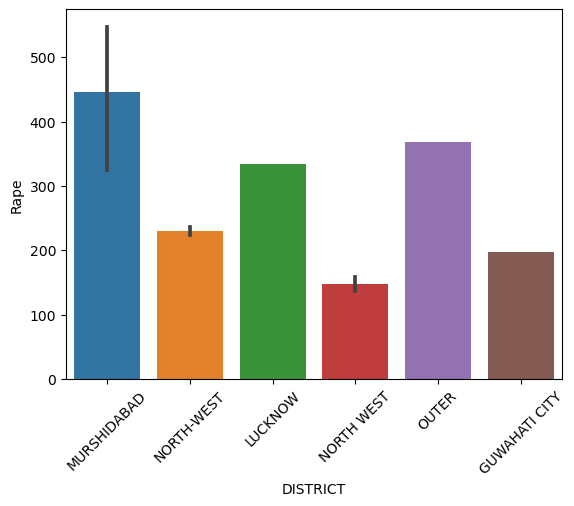

In [80]:
dataframe['Rape'] = pd.to_numeric(dataframe['Rape'], errors='coerce')
sns.barplot(x=dataframe['DISTRICT'], y=dataframe['Rape'])
plt.xticks(rotation= 45)  # Corrected rotation value
plt.show()


# According to the resultant Dataframe, the district of Murshidabad in West Bengal has the largest number of kidnapping cases, while the district of Guwahati City in Assam has the lowest number of cases.